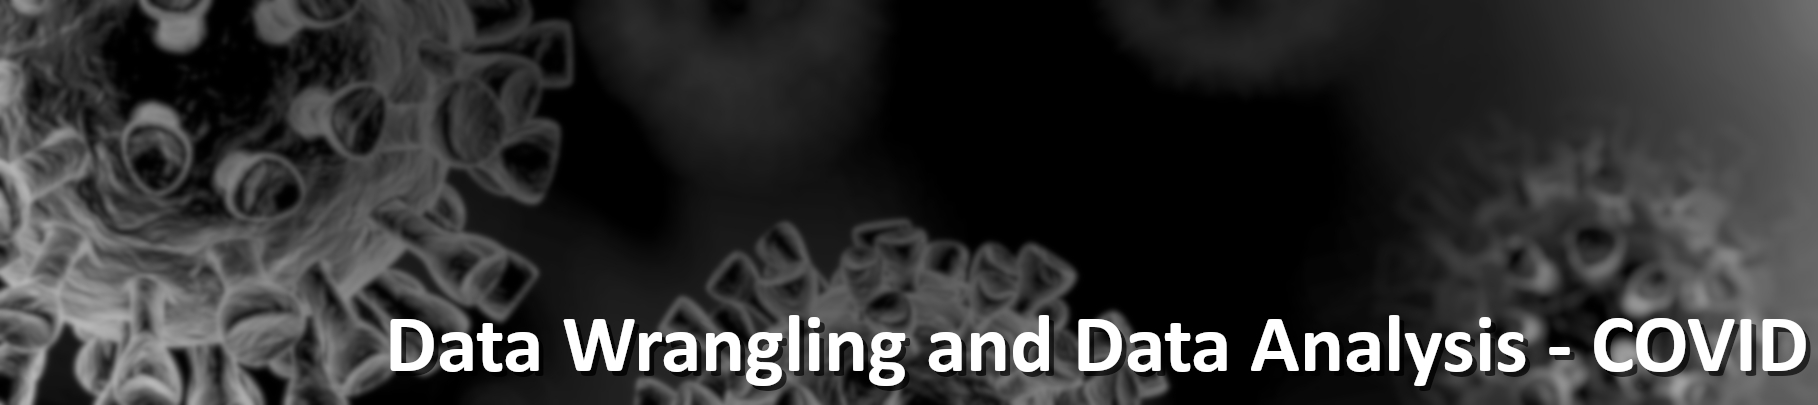

# O que é a COVID-19? #
&nbsp;


A **Covid-19** é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.

O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos.

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo o homem, camelos, gado, gatos e morcegos. Raramente os coronavírus de animais podem infectar pessoas e depois se espalhar entre seres humanos como já ocorreu com o MERS-CoV e o SARS-CoV-2. Até o momento, não foi definido o reservatório silvestre do SARS-CoV-2.


*Fonte: https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus*

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 1. Introdução #

Para este projeto, fora selecionado o conjunto de dados do **[COVID](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md)**, contendo um aglomerado dos relatórios diários de casos ao redor do mundo até o 1º dia de janeiro de 2022, os dados do Dataset estão distribuídos por Estado/Provincia, contendo o número acumulado de mortos e de casos confirmados.

## 1.1. Descrição das variáveis
&nbsp;


|       **Variável**      |                       **Descrição**                    |
|-------------------------|:------------------------------------------------------:|
|         **FIPS**        |   Código de Identificação dos Condados (Apenas EUA).   |
|        **Admin2**       |             Nome do município (Apenas EUA).            |
|    **Province_State**   |        Nome da província, estado ou dependência.       |
|    **Country_Region**   |                      Nome do país.                     |
|     **Last_Update**     |               Data da última atualização               |
|         **Lat**         |   Localização do País, Estado e/ou Região (Latitude).  |
|        **Long_**        |  Localização do País, Estado e/ou Região (Longitude).  |
|      **Confirmed**      |             Contagem de casos confirmados.             |
|        **Deaths**       |                   Contagem de mortes.                  |
|      **Recovered**      |                Contagem de recuperados.                |
|        **Active**       |                      Casos ativos.                     |
|     **Combined_Key**    | Combinação dos campos Province_State e Country_Region. |
|    **Incident_Rate**    |               Casos por 100.000 pessoas.               |
| **Case_Fatality_Ratio** |           Número de Mortes / Número de Casos.          |

## 1.2. Objetivo

**Responder as seguintes questões:**


1. Quais são os países com mais mortes e casos confirmados?
1. Quais são os países com menos mortes e casos confirmados?
1. Quais são os países com maior relação de mortes por casos confirmados?
1. Detalhar a situação do Brasil dentre todos os países?
1. Qual é a região do Brasil com maior índice de mortes e de casos confirmados?

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 2. Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
import seaborn as sns
import json
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.precision', 2)
pd.set_option('float_format', '{:.2f}'.format)

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 3. Carregamento do Dataset

In [2]:
df = pd.read_csv('baseCOVID.csv')

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 4. Visualização Geral do Dados do DataFrame

In [3]:
# Visualização das primeiras linhas do DataFrame (DF)
df.head(3)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-01 04:22:14,33.94,67.71,158084,7356,NaN,NaN,Afghanistan,406.09,4.65
1,NaN,NaN,NaN,Albania,2022-01-01 04:22:14,41.15,20.17,210224,3217,NaN,NaN,Albania,7305.02,1.53
2,NaN,NaN,NaN,Algeria,2022-01-01 04:22:14,28.03,1.66,218432,6276,NaN,NaN,Algeria,498.12,2.87


In [4]:
# Tamanho da base de dados (4006 linhas por 14 colunas)
df.shape

(4006, 14)

In [5]:
# Informações básicas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3832 non-null   object 
 3   Country_Region       4006 non-null   object 
 4   Last_Update          4006 non-null   object 
 5   Lat                  3916 non-null   float64
 6   Long_                3916 non-null   float64
 7   Confirmed            4006 non-null   int64  
 8   Deaths               4006 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4006 non-null   object 
 12  Incident_Rate        3915 non-null   float64
 13  Case_Fatality_Ratio  3966 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.3+ KB


In [6]:
# Quantidade de países únicos
len(df.Country_Region.unique())

196

In [7]:
# Visualização das variáveis númericas do DF
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3268.00,3916.00,3916.00,4006.00,4006.00,0.00,0.00,3915.00,3966.00
mean,32405.94,35.80,-71.35,71949.82,1357.41,NaN,NaN,15280.39,2.45
std,18056.38,13.25,54.90,405525.54,7391.70,NaN,NaN,5947.80,27.79
min,60.00,-52.37,-178.12,0.00,0.00,NaN,NaN,0.00,0.00
25%,19048.50,33.20,-96.60,2038.25,32.00,NaN,NaN,12455.09,1.11
50%,30068.00,37.90,-86.77,5765.50,93.00,NaN,NaN,16614.80,1.60
75%,47041.50,42.18,-77.39,23735.50,325.75,NaN,NaN,19128.02,2.21
max,99999.00,71.71,178.06,10988851.00,155205.00,NaN,NaN,57751.90,1520.62


In [8]:
# Visualização das variáveis categóricas do DF
df.describe(include='O')

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
count,3272,3832,4006,4006,4006
unique,1927,594,196,10,4006
top,Unassigned,Texas,US,2022-01-01 04:22:14,Afghanistan
freq,51,255,3279,3991,1


In [9]:
df.isnull().sum().sort_values(ascending=False)

Recovered              4006
Active                 4006
FIPS                    738
Admin2                  734
Province_State          174
Incident_Rate            91
Lat                      90
Long_                    90
Case_Fatality_Ratio      40
Country_Region            0
Last_Update               0
Confirmed                 0
Deaths                    0
Combined_Key              0
dtype: int64

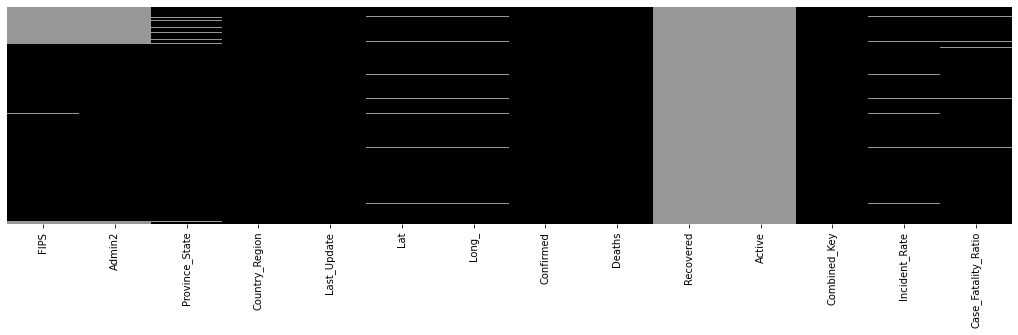

In [10]:
plt.figure(figsize=(18, 4))
sns.heatmap(df.isnull(),  yticklabels=False, cbar=False, cmap='Greys_r', center=1);

> #### Podemos observar que o DF contém alguns valores ausentes, demonstrado pela parte clara do HeatMap acima, porém as variváveis que iremos utilizar em nossa análise estão sem valores nulos.

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 5. Tratamento dos Dados

## 5.1. Exclusão das colunas para melhor visualização dos dados

In [11]:
# Decidi excluir as colunas abaixo, por não as considerar importantes para nossa análise
df.drop(['FIPS', 'Admin2', 'Combined_Key', 'Recovered', 
         'Active', 'Last_Update', 'Lat', 'Long_', 
         'Incident_Rate', 'Case_Fatality_Ratio'], 
        axis=1, inplace=True)

## 5.2. Renomeação das colunas do DataFrame

In [12]:
# Com o intuito de facilitar a organização do DF, efetuado aqui a renomeação das colunas
df.columns = ['Estado', 'Pais', 'CasosConfirmados', 'Mortes']

In [13]:
# Resultado do DF após a exclusão das colunas e renomeação
df.head(3)

,Estado,Pais,CasosConfirmados,Mortes
0,NaN,Afghanistan,158084,7356
1,NaN,Albania,210224,3217
2,NaN,Algeria,218432,6276


### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 6. Exportação da Base de Dados

In [14]:
df.to_csv('baseCOVIDEditada.csv', index=False)

> #### Efetuada a exportação da base de dados ora tratada, em formato .CSV com nome "baseCOVIDEditada.csv".

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 7. Análise Explotarória dos Dados

## 7.1. Verificação da relação entre as variáveis CasosConfirmados e Mortes

<Figure size 1296x360 with 0 Axes>

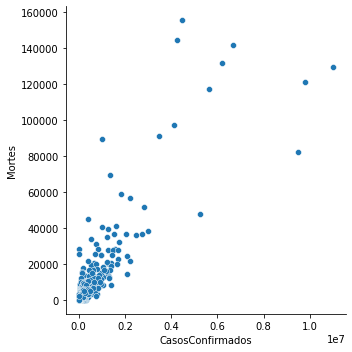

In [15]:
plt.figure(figsize=(18,5))
sns.relplot(x='CasosConfirmados', y='Mortes', data=df)

> #### Como era de se esperar, o gráfico deixa claro a correlação das variáveis "CasosConfirmados" e "Mortes".

## 7.2. Visualização Utilizando a Biblioteca "sweetviz"

In [16]:
analise = sv.analyze(df).show_html();

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


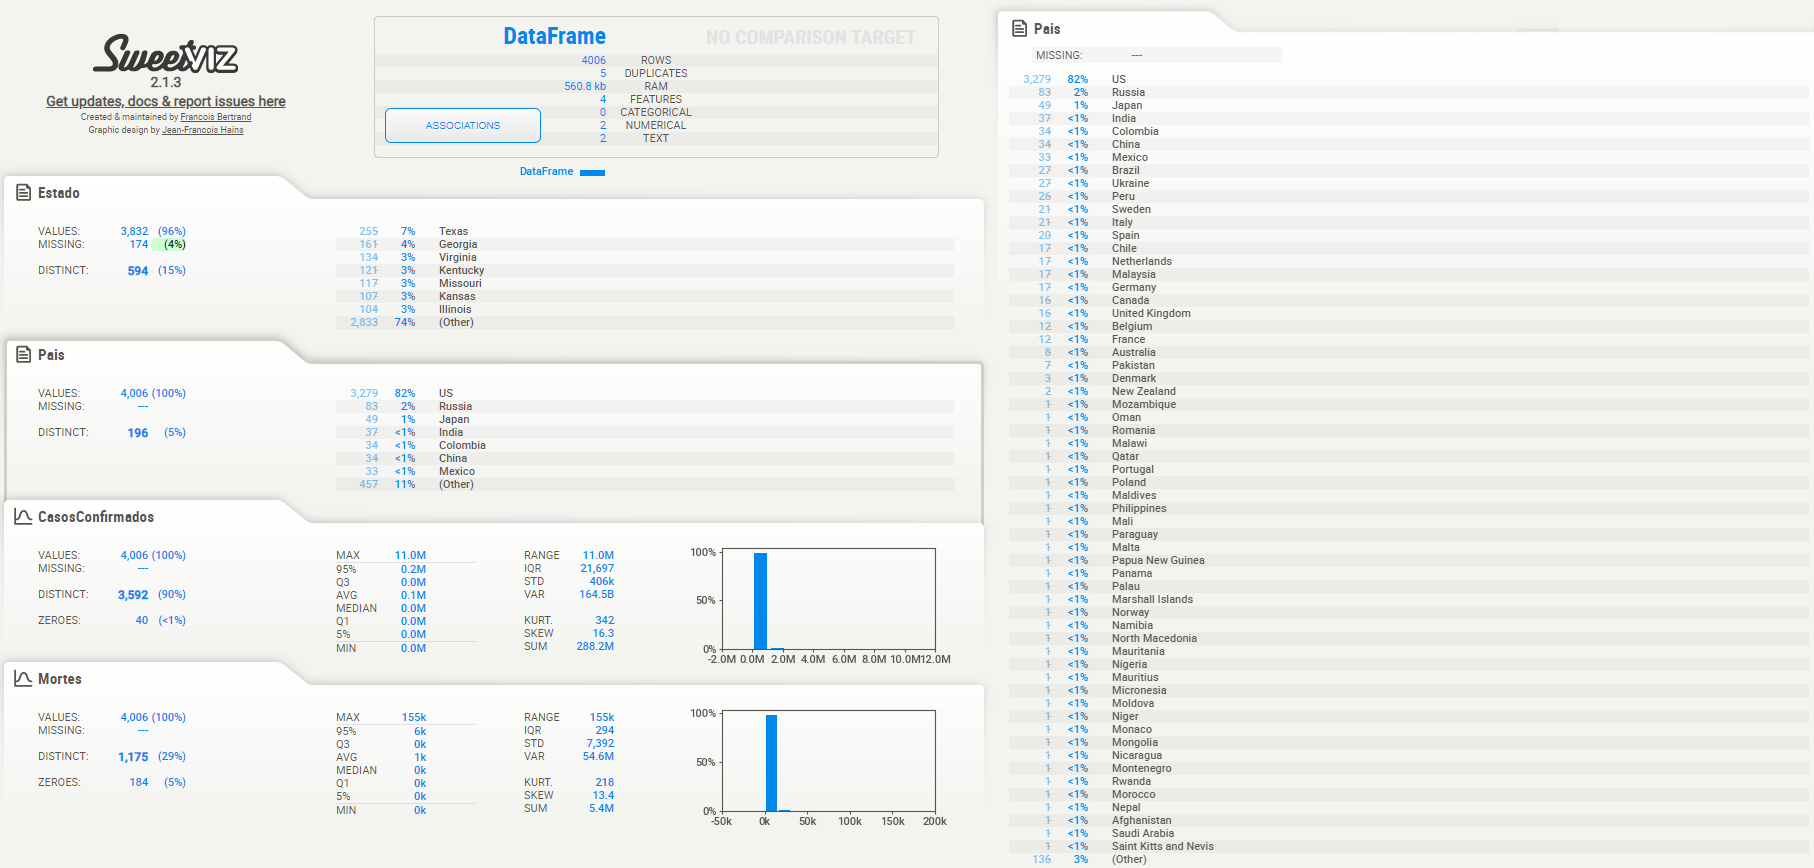

In [17]:
dfSemUS = df.loc[df.Pais != 'US']
comparacao = sv.compare([df, 'Com US'], [dfSemUS, 'Sem  US']).show_html();

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


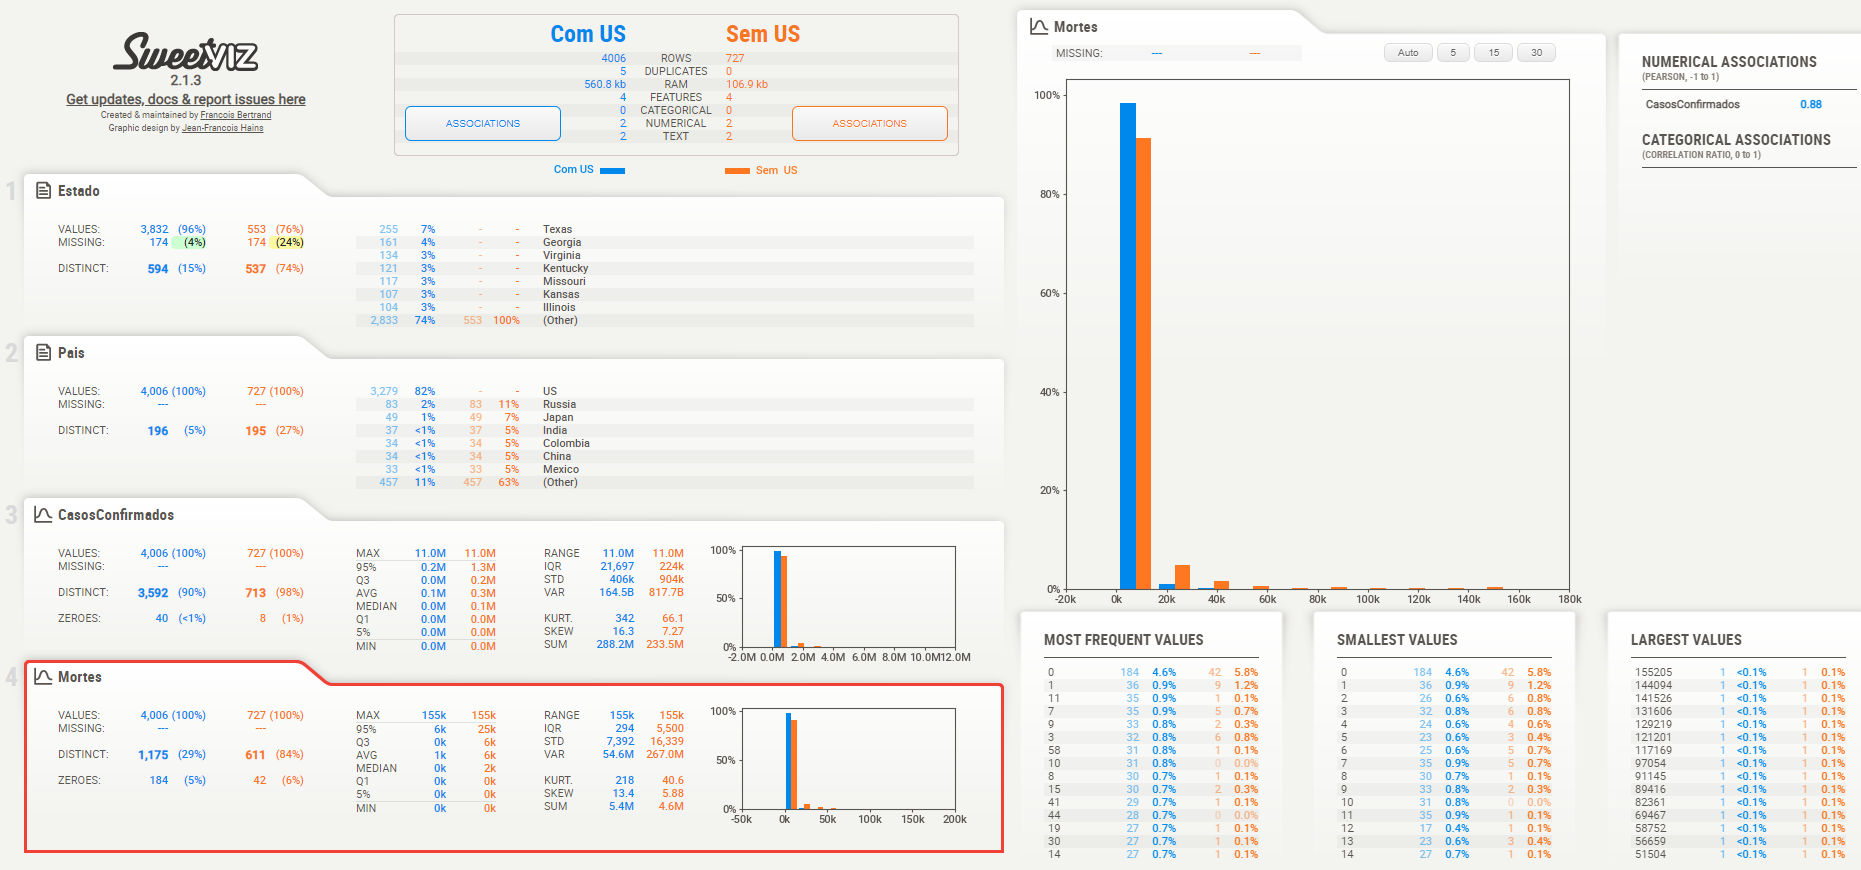

> #### Imagens geradas em .HTML:
> #### Imagem 1. Principais características das variáveis contidas no DF, após sua transformação.
> #### Imagem 2. Comparativo entre o DF e o DF contendo apenas os Estados Unidos (US), responsável por cerca de 18% dos registros contidos na base.

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 8. Objetivo

## 8.1 Quais são os países com mais mortes e casos confirmados?

### 8.1.1. Plotando o gráfico dos Top 10 com mais óbitos confirmados

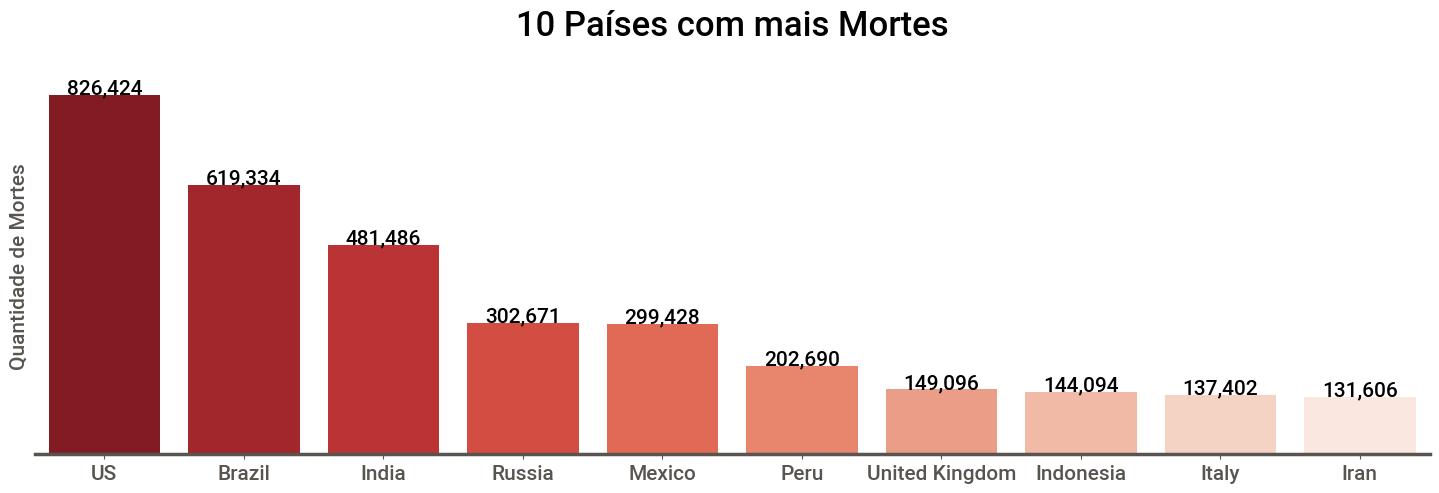

In [18]:
# Criação de um novo DF ordenado pela quantidade de mortes
dfPaisMaisMortes = pd.DataFrame(df.groupby('Pais').Mortes.sum().sort_values(ascending=False)[0:10]).reset_index()

# Plotagem do gráfico

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='Pais', y='Mortes', data=dfPaisMaisMortes, palette='Reds_r')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Mortes', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('10 Países com mais Mortes', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

> #### O gráfico acima evidencia os países com mais mortes, sendo os Estados Unidos responsável pela maior quantidade de óbitos desde o ínicio da pandemia (ou pelo menos do registro dos dados).

#### 8.1.1.1. Vamos comparar a quantidade de mortos nos 10 países com o restante do mundo.

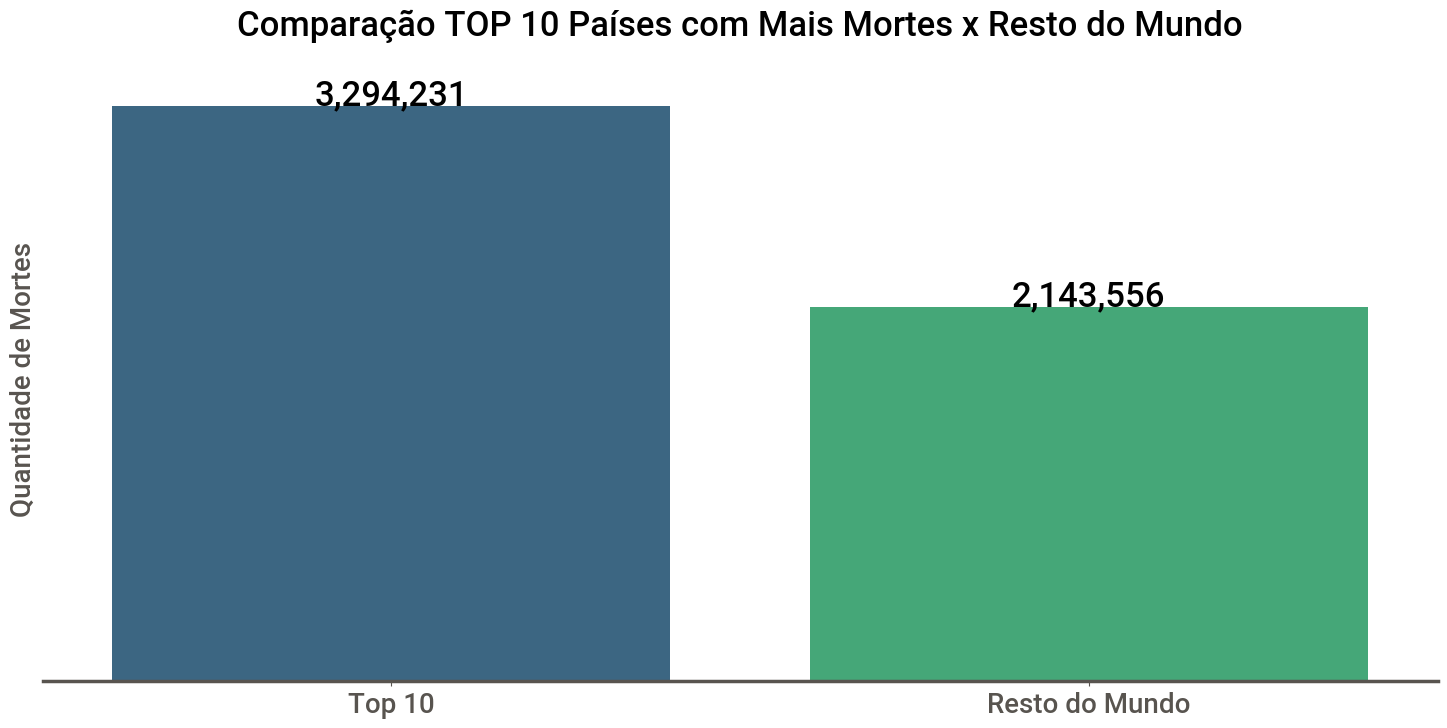

In [19]:
# Criação de um novo DF contendo o total de mortes dos países TOP 10 x total de mortes do Resto do Mundo

dfComparacaoPaisMaisMortes = pd.DataFrame()
dfComparacaoPaisMaisMortes['Pais/Mundo'] = ''
dfComparacaoPaisMaisMortes['Mortes'] = ''
dfComparacaoPaisMaisMortes.loc[0] = ['Top 10', dfPaisMaisMortes.Mortes.sum()]
dfComparacaoPaisMaisMortes.loc[1] = ['Resto do Mundo', df.Mortes.sum() - dfPaisMaisMortes.Mortes.sum()]
dfComparacaoPaisMaisMortes['PercMorte'] = (dfComparacaoPaisMaisMortes.Mortes / dfComparacaoPaisMaisMortes.Mortes.sum()) * 100

# Plotagem do gráfico

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='Pais/Mundo', y='Mortes', data=dfComparacaoPaisMaisMortes, palette='viridis')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Mortes', fontsize=20)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=20)
ax.set_title('Comparação TOP 10 Países com Mais Mortes x Resto do Mundo', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=25)

> #### Vemos que os TOP 10 países com mais óbitos são responsáveis por cerca de 60% das mortes pelo mundo (registradas nessa base de dados). 

### 8.1.2. Plotando o gráfico dos Top 10 com mais casos confirmados

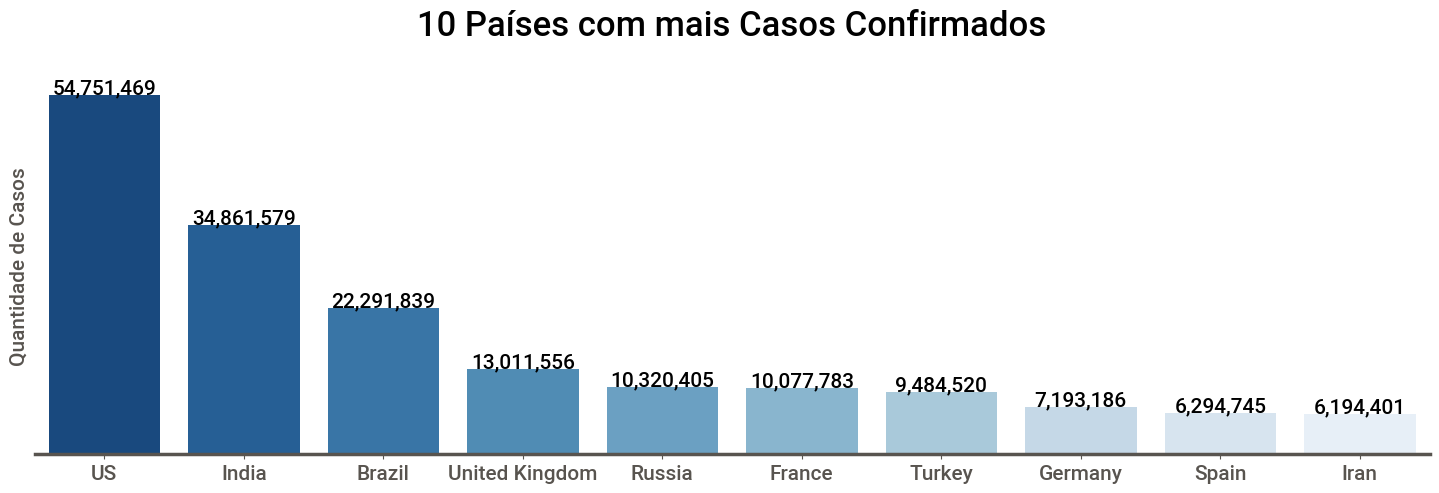

In [20]:
# Criação de um novo DF ordenado pela quantidade de casos confirmados

dfPaisMaisCasos = pd.DataFrame(df.groupby('Pais').CasosConfirmados.sum().sort_values(ascending=False)[0:10]).reset_index()

# Plotagem do gráfico

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='Pais', y='CasosConfirmados', data=dfPaisMaisCasos, palette='Blues_r')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Casos', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('10 Países com mais Casos Confirmados', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

> #### Semelhante aos países que tiveram mais óbitos, podemos verificar que os Estados Unidos têm a maior quantidade de casos confirmados da doença. O que é preocupante é o caso do Peru, que aparece na 6ª posição dos casos de mortes confirmadas (202 mil pessoas) porém sequer aparece no gráfico acima. 

## 8.2 Quais são os países com menor mortes e casos confirmados?

### 8.2.1 Plotando o gráfico dos Top 10 com menos óbitos

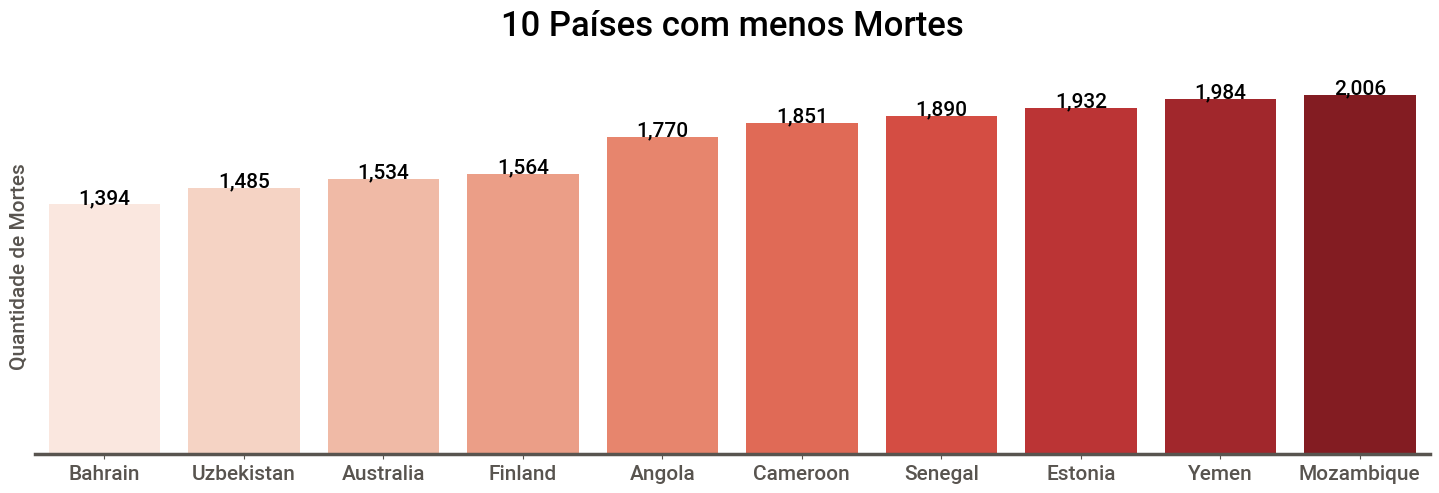

In [21]:
# Retirada a média de mortes para criação do DataFrame com os países cujo número de mortes seja superior a média

dfPaisesMenosMortes = df.loc[df.Mortes >= df.Mortes.mean()]
dfPaisMenosMortes = pd.DataFrame(dfPaisesMenosMortes.groupby('Pais').Mortes.sum().sort_values()[0:10]).reset_index()

# Plotagem do gráfico

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='Pais', y='Mortes', data=dfPaisMenosMortes, palette='Reds')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Mortes', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('10 Países com menos Mortes', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

> #### Acima, listagem dos países com menos mortes a partir da quantidade média de mortes registradas na base de dados.

### 8.2.2. Plotando o gráfico dos Top 10 com menos casos confirmados

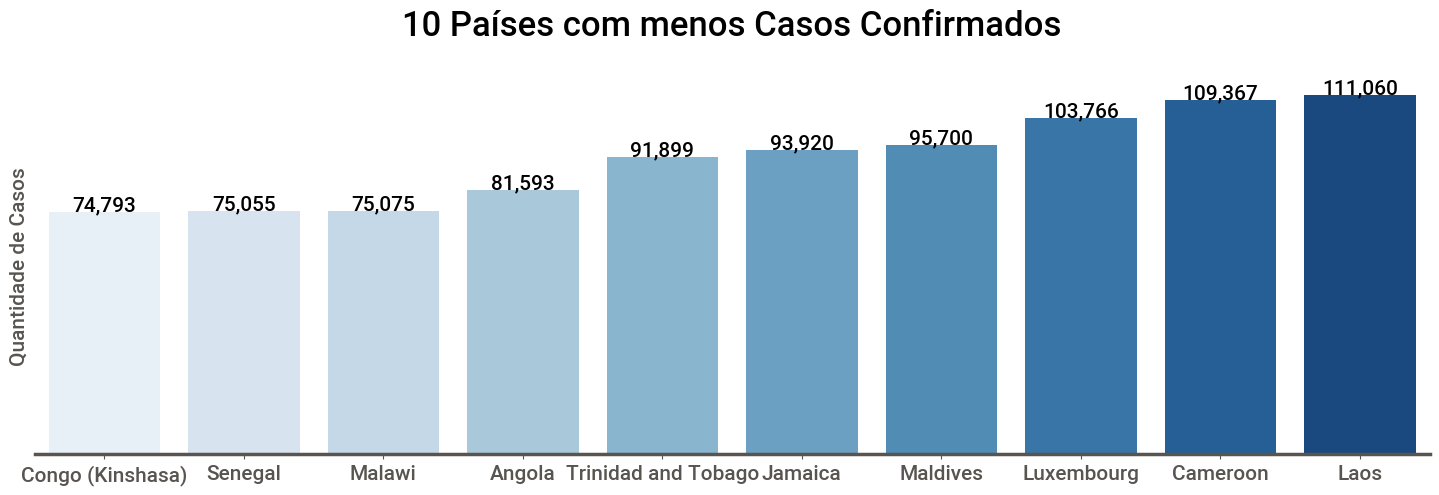

In [22]:
# Retirada a média de casos para criação do DataFrame com os países cujo número de casos seja superior a média

dfPaisMenosCasos = df.loc[df.CasosConfirmados >= df.CasosConfirmados.mean()]
dfPaisMenosCasos = pd.DataFrame(dfPaisMenosCasos.groupby('Pais').CasosConfirmados.sum().sort_values()[0:10]).reset_index()

# Plotagem do gráfico

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='Pais', y='CasosConfirmados', data=dfPaisMenosCasos, palette='Blues')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Casos', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('10 Países com menos Casos Confirmados', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

In [23]:
df.loc[df.Pais == 'Congo (Kinshasa)']

,Estado,Pais,CasosConfirmados,Mortes
181,NaN,Congo (Kinshasa),74793,1205


> #### Podemos observar que os quatro primeiros países estão com a quantidade de casos confirmados um pouco acima da média (71,949 Casos Confirmados), provavelmente pela falta de estrutura dos países africanos quanto a captura e fidelidade das informações obtidas. Destaca-se o caso do Congo (Kinshasa), o qual não consegui obter informações se os dados tratam apenas da capital ou de todo o território.

## 8.3. Quais são os países com maior relação de mortes por casos confirmados?

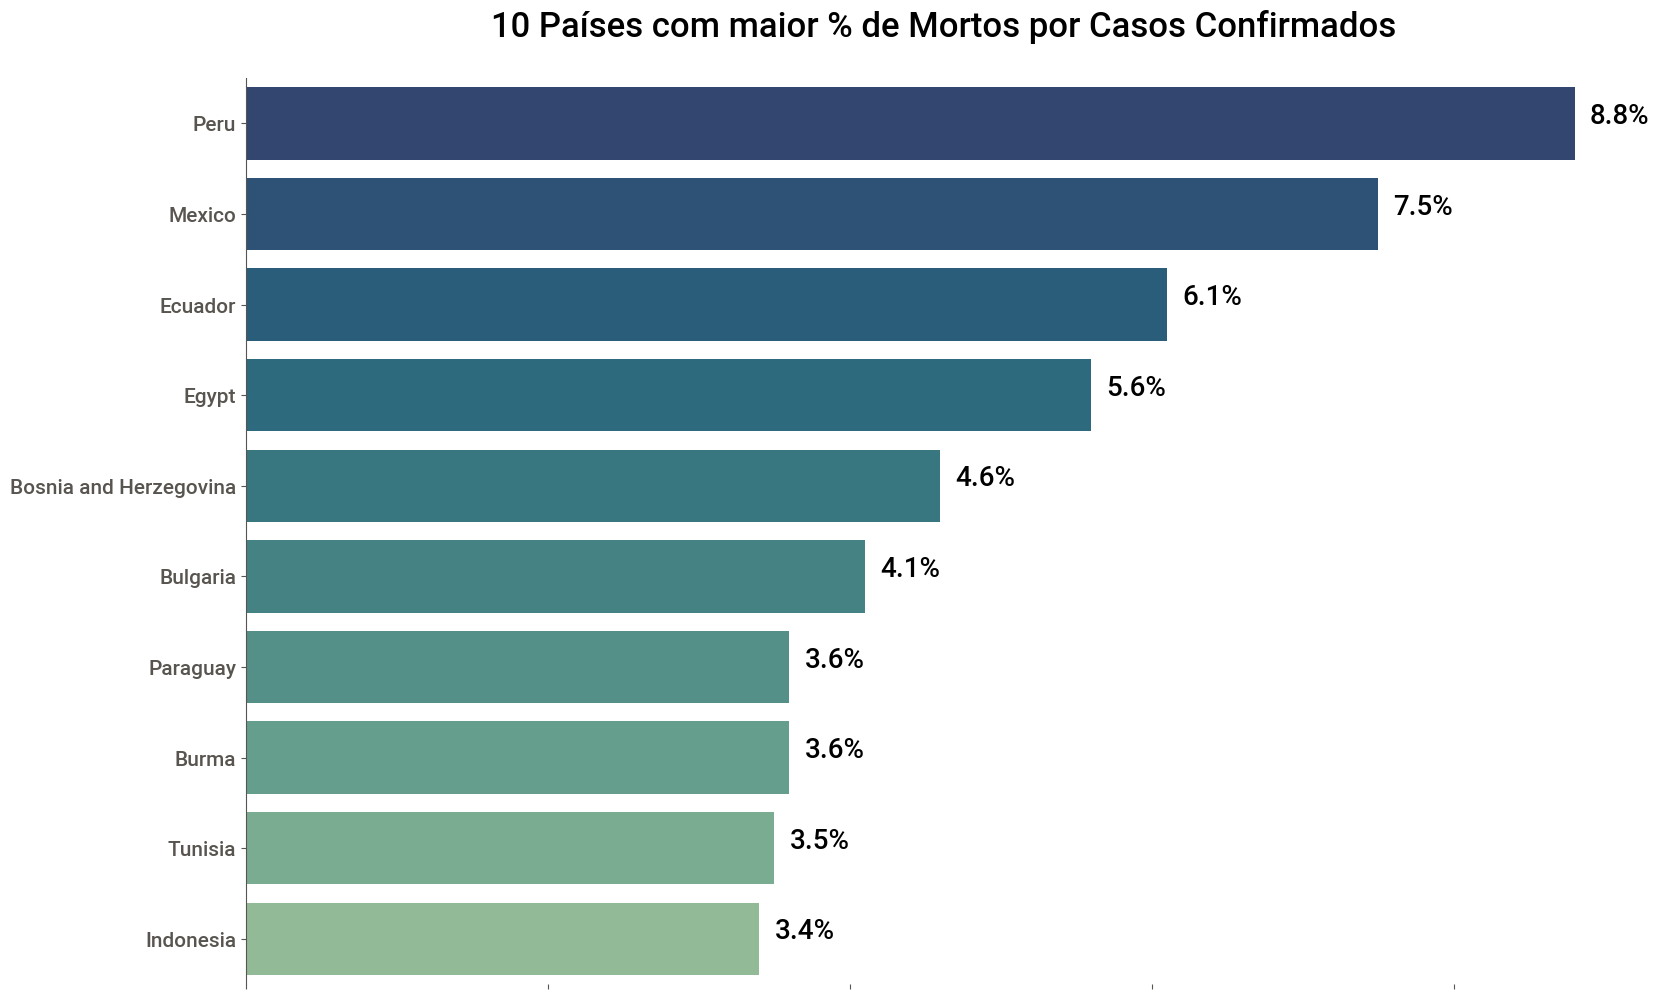

In [24]:
# Criando uma coluna de porcentagem de mortos/casos confirmados

dfTodosPaises = df.groupby('Pais').sum()
dfTodosPaises = dfTodosPaises.loc[(dfTodosPaises.Mortes > 10000) & (dfTodosPaises.CasosConfirmados > 50000)]
dfTodosPaises['PorcentagemMortos'] = ((np.round(dfTodosPaises.Mortes / dfTodosPaises.CasosConfirmados, 3))*100)
dfPaisPorcMortos = dfTodosPaises['PorcentagemMortos'].sort_values(ascending=False)[0:10].reset_index()

# Plotagem do gráfico

fig, ax = plt.subplots(figsize=(18, 12))
sns.barplot(y='Pais', x='PorcentagemMortos', data=dfPaisPorcMortos, palette='crest_r')
ax.tick_params(axis='x', labelbottom=False), ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(''), ax.set_ylabel(''), ax.set_title('10 Países com maior % de Mortos por Casos Confirmados', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)

for axis in ['top', 'right', 'bottom']:    ax.spines[axis].set_color(None)

labels = []
valores = []
total = 0

for numero in dfPaisPorcMortos.PorcentagemMortos:        
    valores.append(np.round(numero, 2))
    total += numero  
index = np.arange(len(labels))

for i, v in enumerate(valores):
    plt.text(v + 0.1, i , s=(str(v) + '%'), color='black', fontsize=20)


> #### Como exposto acima, o Peru é o país com maior quantidade de mortes/casos confirmados.

In [25]:
totalMortesPeru = df.Mortes.loc[df.Pais == 'Peru'].sum()
totalCasosConfirmadosPeru = df.CasosConfirmados.loc[df.Pais == 'Peru'].sum()
print(f'\033[1;31mMorreram {totalMortesPeru:,}\033[m pessoas no Peru.')
print(f'\033[1;34mHouve/Houveram {totalCasosConfirmadosPeru:,}\033[m casos confirmados.')

Morreram 202,690 pessoas no Peru.
Houve/Houveram 2,296,831 casos confirmados.


> #### Por meio do gráfico e dos dados obtidos acima, constatamos que o Peru foi o país que teve mais mortos (202,690) por caso confirmado (2,296,831) representando quase 9% de taxa.

## 8.4. Detalhar a situação do Brasil dentre todos os países?
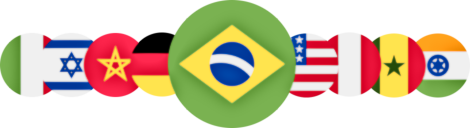

In [26]:
# Criação do Dataset dfBrasil com as informação do país e posterior visualização das primeiras linhas
dfBrasil = df.loc[df.Pais == 'Brazil']
dfBrasil.head(3)

,Estado,Pais,CasosConfirmados,Mortes
41,Acre,Brazil,88384,1851
42,Alagoas,Brazil,242080,6383
43,Amapa,Brazil,126981,2022


In [27]:
# Ordenação por ordem alfabética pela coluna estado
dfBrasil.sort_values(by=['Estado'], inplace=True)

In [28]:
# Verificando se há dados ausentes no Dataset dfBrasil
dfBrasil.isnull().sum()

Estado              0
Pais                0
CasosConfirmados    0
Mortes              0
dtype: int64

In [29]:
# Abertura do arquivo json que desenhará os estados no mapa
br_estados = 'br_estados.json'
geo_json_data = json.load(open(br_estados))

In [30]:
# Instanciando os mapas
mapaMortes = folium.Map(location=[-20.77972,-55.92972], zoom_start = 4, control_scale=False, prefer_canvas=False)
mapaCasos = folium.Map(location=[-20.77972,-55.92972], zoom_start = 4, control_scale=False, prefer_canvas=True)

In [31]:
# Criação das variváveis LogMortes e LogCasos para uma melhor representação nos gráficos.
dfBrasil['LogMortes'] = np.log(dfBrasil['Mortes'])
dfBrasil['LogCasos'] = np.log(dfBrasil['CasosConfirmados'])

In [32]:
# Criação das camadas no mapa representando o Log das Mortes por Estado
mapaMortes = folium.Map(width='100%', height='100%', location=[-20.77972,-55.92972], zoom_start = 4, min_zoom=4, max_zoom=4)

choropleth = folium.Choropleth(geo_data = geo_json_data,
                               data = dfBrasil,
                               columns = ['Estado', 'LogMortes'],
                               key_on = 'properties.name',
                               fill_color = 'Reds', 
                               fill_opacity = 1,
                               line_color = 'white',
                               line_opacity = 1,
                               legend_name = 'Log das Mortes Confirmadas',
                               highlight=True
).add_to(mapaMortes)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False));

#mapaMortes.save("mapaMortes.html")
#mapaMortes #Linha comentada em razão do tamanho do arquivo gerado.

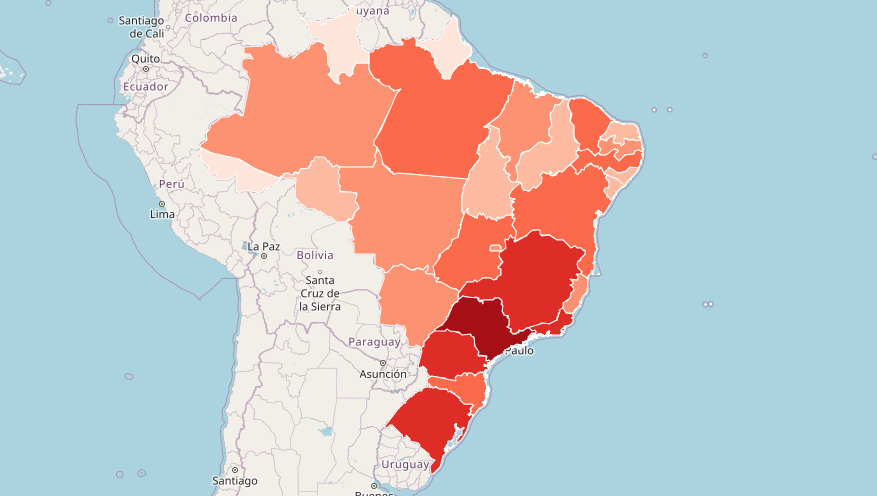

#####  Imagem do Mapa em HTML, resolvi não deixar ele direto no Jupyter em razão do tamanho do arquivo. Caso queira rodar é só tirar o comentário da linha #MapaMortes da célula acima.

> #### Fica nítido que a Região Sudeste, encabeçada pelo Estado de São Paulo é a região que mais teve mortes pela doença.

In [33]:
# Criação das camadas no mapa representando o Log dos Casos Confirmados por Estado

mapaCasos = folium.Map(width='100%', height='100%', location=[-20.77972,-55.92972], zoom_start = 4, min_zoom=4, max_zoom=4)

choropleth = folium.Choropleth(geo_data = geo_json_data,                               
                               data = dfBrasil,
                               columns = ['Estado', 'LogCasos'],
                               key_on = 'properties.name',
                               fill_color = 'Blues', 
                               fill_opacity = 1,
                               line_color = 'white',
                               line_opacity = 1,
                               legend_name = 'Log dos Casos Confirmados',
                               highlight=True
).add_to(mapaCasos)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], aliases=['name'], style=style_function, labels=False));

#mapaCasos.save("mapaCasos.html")
#mapaCasos #Linha comentada em razão do tamanho do arquivo gerado.

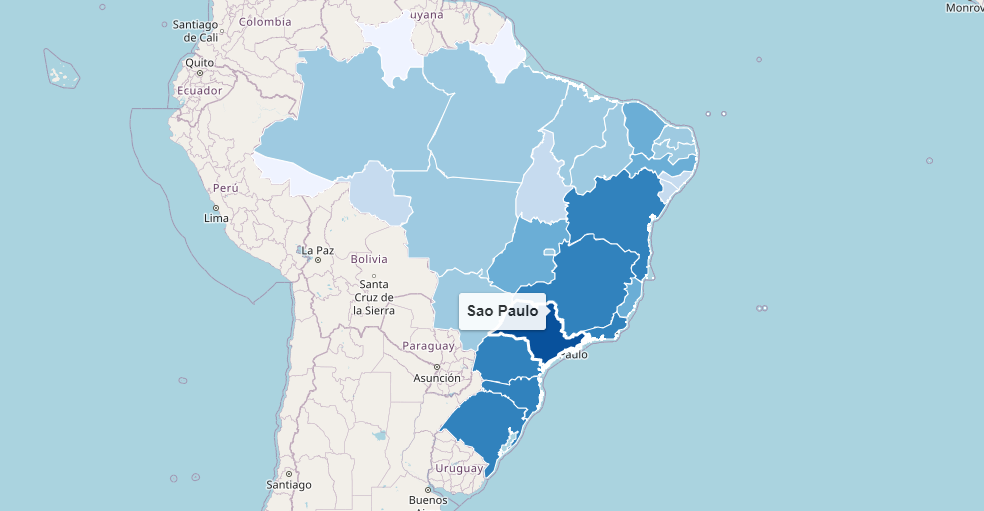

##### Imagem do Mapa em HTML, resolvi não deixar ele direto no Jupyter em razão do tamanho do arquivo. Caso queira rodar é só tirar o comentário da linha #MapaCasos da célula acima.

> #### O gráfico se assemelha muito ao de cima, o que mais uma vez prova a correlação entre o número de casos e o número de mortes pela doença.

In [34]:
dfBrasil.head(3)

,Estado,Pais,CasosConfirmados,Mortes,LogMortes,LogCasos
41,Acre,Brazil,88384,1851,7.52,11.39
42,Alagoas,Brazil,242080,6383,8.76,12.40
43,Amapa,Brazil,126981,2022,7.61,11.75


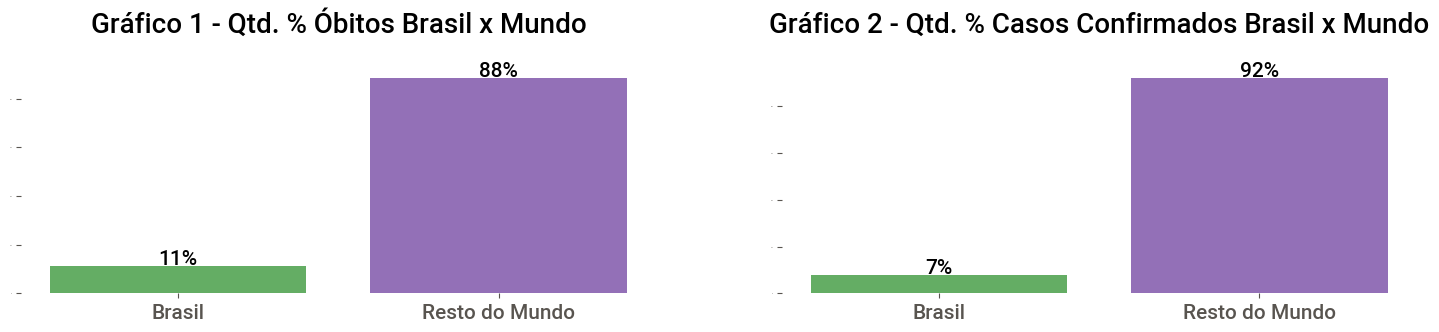

In [35]:
# Criação de DF e variváveis auxiliares para plotagem do gráfico comparativo Braxil x Mundo

dfRestoMundo = df.loc[df.Pais != 'Brazil']
PercRestoMundoMortes = dfRestoMundo.Mortes.sum() / df.Mortes.sum() * 100
PercRestoMundoCasos =  dfRestoMundo.CasosConfirmados.sum() / df.CasosConfirmados.sum() * 100
PercBrasilMortes = dfBrasil.Mortes.sum() / df.Mortes.sum() * 100
PercBrasilCasos = dfBrasil.CasosConfirmados.sum() / df.CasosConfirmados.sum() * 100

# Plotagem do gráfico

labels = ['Brasil', 'Resto do Mundo']
y_mortes = [PercBrasilMortes, PercRestoMundoMortes]
y_casos = [PercBrasilCasos, PercRestoMundoCasos]

f, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 3))

gra1.bar(labels, y_mortes, alpha=0.7, color=['forestgreen', 'rebeccapurple'])
plt.sca(gra1), gra1.set_ylabel(''), gra1.set_xlabel('')
gra1.set_title('Gráfico 1 - Qtd. % Óbitos Brasil x Mundo', fontsize=20, pad=25)
gra1.tick_params(axis='y', labelsize=0)
plt.xticks([0, 1], labels, fontsize=15)

gra2.bar(labels, y_casos, alpha=0.7, color=['forestgreen', 'rebeccapurple'])
plt.sca(gra2), gra2.set_ylabel(''), gra2.set_xlabel('')
gra2.set_title('Gráfico 2 - Qtd. % Casos Confirmados Brasil x Mundo', fontsize=20, pad=25)
plt.xticks([0, 1], labels, fontsize=15);
gra2.tick_params(axis='y', labelsize=0)

for axis in ['top', 'right', 'bottom', 'left']:    
    gra1.spines[axis].set_color(None)
    gra2.spines[axis].set_color(None)

for i in gra1.patches:
    gra1.annotate(f'{int(i.get_height())}%',
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

for i in gra2.patches:
    gra2.annotate(f'{int(i.get_height())}%',
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

## 8.5. Qual é a região do Brasil com maior índice de mortes e de casos confirmados?

In [36]:
# Carregamento do arquivo CSV que relacionará o Estado à sua Região correspondente
dfEstadoRegiao = pd.read_csv('estadoRegiao.csv', sep=';')
dfEstadoRegiao.head()

,Pais,Regiao
0,Acre,Norte
1,Alagoas,Nordeste
2,Amapa,Norte
3,Amazonas,Norte
4,Bahia,Nordeste


In [37]:
# Renomeando as colunas do novo DF
dfEstadoRegiao.columns = ['Estado', 'Regiao']

In [38]:
# Unificando o novo DF com o DF base Brasil
dfBrasil = pd.merge(dfBrasil, dfEstadoRegiao)

In [39]:
# Agrupando os Estados por Região
dfRegiao = dfBrasil.groupby('Regiao').sum().reset_index()

In [40]:
# Excluindo as colunas LogMortes e LogCasos, pois agora iremos trabalhar com os valores absolutos
dfRegiao.drop(['LogMortes', 'LogCasos'], axis=1, inplace=True)

In [41]:
# Visualização do DFRegiao
dfRegiao.head()

,Regiao,CasosConfirmados,Mortes
0,Centro-Oeste,2406002,59588
1,Nordeste,4950128,120018
2,Norte,1923966,47550
3,Sudeste,8662789,294659
4,Sul,4348954,97519


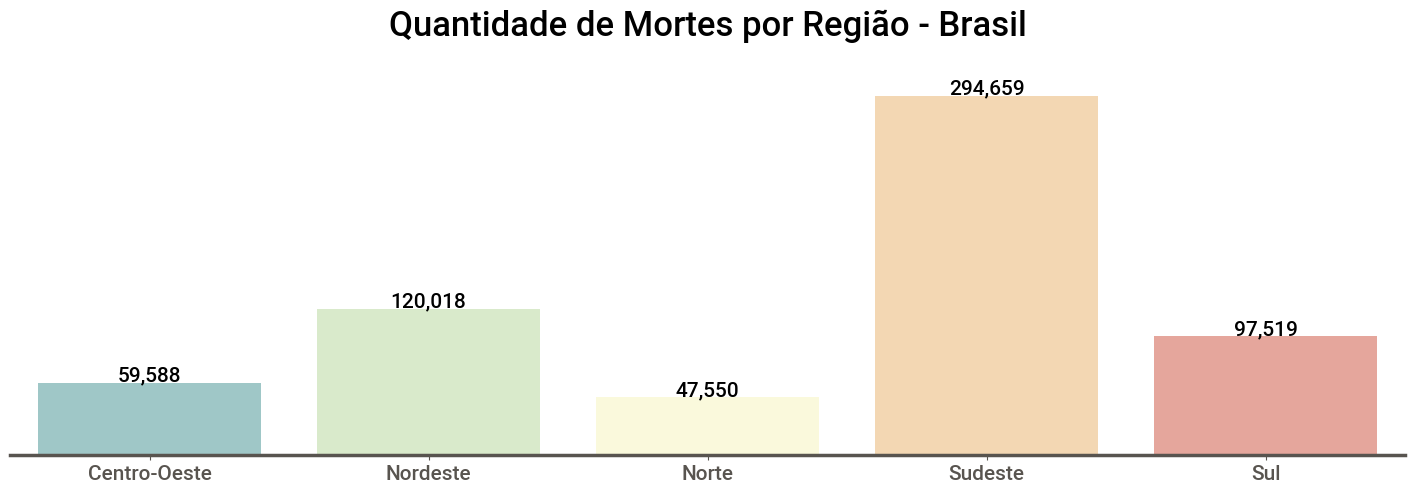

In [42]:
# Instanciando e plotagem do gráfico com a relação de mortes por cada Região do Brasil

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='Regiao', y='Mortes', data=dfRegiao, alpha=0.6, palette='Spectral_r')
ax.set_xlabel(''), ax.set_ylabel('')
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('Quantidade de Mortes por Região - Brasil', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)
altura = []
for i in dfRegiao.Mortes:   altura.append(i)
posicao = []
for i in range(0,10,1):     posicao.append(i)
for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)

> #### Reiterando o exposto acima, confirma-se que a Região Sudeste é a que teve mais óbitos pela doença, representando quase 50% dos casos em nosso país.

In [43]:
dfRegiao['PercMorte'] = ((dfRegiao.Mortes / dfRegiao.Mortes.sum()) * 100)
dfRegiao['PercCasos'] = ((dfRegiao.CasosConfirmados / dfRegiao.CasosConfirmados.sum()) * 100)
#dfRegiao = dfRegiao.sort_values(by='Mortes')

In [44]:
dfRegiao.head()

,Regiao,CasosConfirmados,Mortes,PercMorte,PercCasos
0,Centro-Oeste,2406002,59588,9.62,10.79
1,Nordeste,4950128,120018,19.38,22.21
2,Norte,1923966,47550,7.68,8.63
3,Sudeste,8662789,294659,47.58,38.86
4,Sul,4348954,97519,15.75,19.51


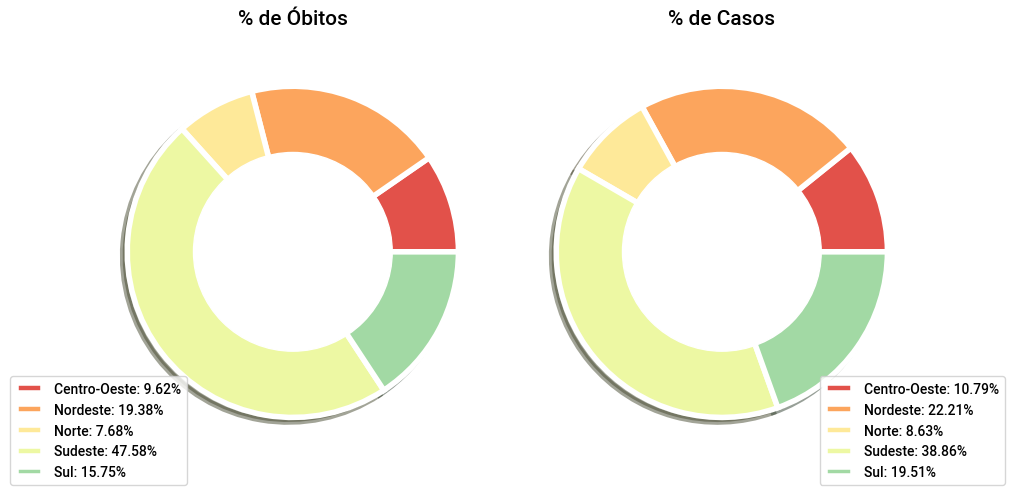

In [45]:
listaLabelsMortes = list()
listaLabelsCasos = list()
for regiao in dfRegiao.Regiao:
    listaLabelsMortes.append(f'{regiao}: {np.round(dfRegiao.PercMorte.loc[dfRegiao.Regiao == regiao].values[0], 2)}%')
    listaLabelsCasos.append(f'{regiao}: {np.round(dfRegiao.PercCasos.loc[dfRegiao.Regiao == regiao].values[0], 2)}%')
    
colors = sns.color_palette('Spectral')

f, (gra1, gra2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

gra1.pie(dfRegiao.PercMorte, wedgeprops={'linewidth':4, 'edgecolor': 'white'}, colors=colors, shadow=True)
gra1.set_title('% de Óbitos', fontsize=15, pad=15)
circulo = plt.Circle((0,0), 0.6, color='white')
gra1.add_artist(circulo)
gra1.legend(listaLabelsMortes, loc=3, bbox_to_anchor=(-0.2, -0.08))

listaLabelsCasos

gra2.pie(dfRegiao.PercCasos, wedgeprops={'linewidth':4, 'edgecolor': 'white'}, colors=colors, shadow=True)
gra2.set_title('% de Casos', fontsize=15, pad=15)
circulo = plt.Circle((0,0), 0.6, color='white')
gra2.add_artist(circulo)
gra2.legend(listaLabelsCasos, loc=4, bbox_to_anchor=(1.2, -0.08))

plt.tight_layout()

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 9. Conclusões
&nbsp;



* Os dados afirmam que a doença já matará mais de 5 milhões de pessoas ao redor do globo.


* A Covid-19 é extremamente contagiosa, haja vista o número de infectados relatados até então, cerca de 290 milhões de pessoas.


* O Brasil, "liderado" pela Região Sudeste, até o momento é um dos países que mais sofreu com a doença, sendo responsável por 11 % dos casos de óbitos registrados no mundo.


* Acredito que o ***Dataset***, apesar de possuir uma boa quantidade de dados, não traz plenamente a realidade, uma vez que manter as informações sempre atualizadas é extremamente complexo, principalmente em locais com estruturas precárias, como em diversos países de 3º mundo, e em países de 2º mundo, onde as infomações nem sempre são divulgadas.


* Em que pese a limitação exposta, creio que os resultados disponibilizados aqui, para uma breve análise da doença, foram satisfatórios.

### <center> --------------------------------------------------------------------------------------------------------------------------- </center>


|                                                                                                                                               |                                                       Contatos                                                      |                                                                                                                         |
|:---------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------------------------:|
| <img width=40 align='center' alt='Thiago Ferreira' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/linkedin/linkedin-original.svg" /> | <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" /> | <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/facebook/facebook-original.svg" /> |
|                                            [Linkedin](https://www.linkedin.com/in/tferreirasilva/)                                            |                                    [Github](https://github.com/ThiagoFerreiraWD)                                    |                                [Facebook](https://www.facebook.com/thiago.ferreira.50746)                               |
|                                                                                                                                               |                                                Autor: Thiago Ferreira                                               |                                                                                                                         |